# **Clasificacion de Multiples Clases con Redes Neuronales Profundas**

En este cuaderno (Laboratorio 4) vamos a explorar como crear redes neuronales para la clasificación de multiples clases haciendo uso de la API functional de Keras, teniendo en cuenta lo visto en las lecciones del curso [Deep Learning y Redes Neuronales](https://).

## **Objetivos**

* Implementar una red neuronal profunda utilizando Keras para la classificación de multiples clases.
* Aprende como codificar las etiquetas Y utilizando la tecnica One Hot Encodiding.
* Implementar un modelo utilizando la API [Functional](https://keras.io/guides/functional_api/) de Keras.
* Aprender a utilizar callbacks.
* Aprender como guardar nuestro modelo luego de entrenarlo.

Para comenzar importaremos algunas liberias utilizadas para la implementación del modelo.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import datasets as tfds

Cargamos nuestros datos, en este caso utilizaremos un conjunto de datos en 2D de 4 clases, esto para poder observar como resulta la frontera de decisión.

El tamaño de X es: (400, 2)
El tamaño de Y es: (400,)


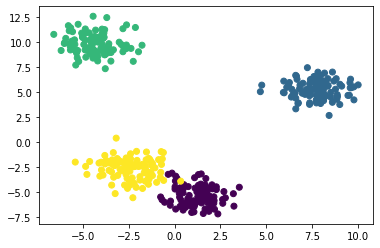

In [4]:
X, Y = datasets.make_blobs(n_samples=400, centers=4) # Crea un dataset de prueba en 2D para clasificacion binaria

print("El tamaño de X es: " + str(X.shape)) # Tamaño de las variables de entrada
print("El tamaño de Y es: " + str(Y.shape)) # Tamañano de las etiquetas

plt.scatter(X[:,0], X[:,1], c=Y) # Grafica de los datos
plt.show()

## Preprocesamiento

Una vez cargados nuestros datos hacemos el preprocesamiento necesario para optimizar el entrenamiento de nuestro modelo. En primer lugar normalizamos los datos de entrada X para que se encuentren entre 0 y 1. Para esto nos apoyamos de algunas funciones de la libreria sklearn.

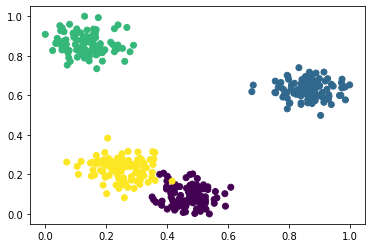

In [5]:
# Normalizamos los datos para que esten entre 0 y 1
scaler = MinMaxScaler()
X = scaler.fit_transform(X) # y = (X - min)/(max - min)

plt.scatter(X[:,0], X[:,1], c=Y) # Grafica de los datos
plt.show()

Ya que se tienen los datos de entra X procesados, es necesarios procesar las etiquetas Y, ya que estas etiquetas simplemente dicen el numero de la clase y para poder entrenar nuestro modelo es necesario codificar estas etiquetas con la técnica one hot encoding. La técnica one hot encoding consiste en generar una matriz de unos y ceros donde cada 1 se encuentra en el indice que corresponde a la clase.

**Ejemplo:**

En caso de tener 4 clases donde $C = 0,1,2,3$ y tenenmos nuestro set de etiquetas Y con un total de 6 ejemplos donde cada ejemplo consiste en el numero de la clase $C$. La codificación one hot queda de la siguiente manera.

<center>
  \begin{equation*}
    Y = 
    \begin{bmatrix}
      0 \\
      2 \\
      1 \\
      3 \\
      1 \\
      1
    \end{bmatrix}
    \qquad
    Y_{oneHot} = 
    \begin{bmatrix}
      1 & 0 & 0 & 0 \\
      0 & 0 & 1 & 0 \\
      0 & 1 & 0 & 0 \\
      0 & 0 & 0 & 1 \\
      0 & 1 & 0 & 0 \\
      0 & 1 & 0 & 0
    \end{bmatrix}
  \end{equation*}
<center/>

Para realizar esta codificación tambien haremos uso de algunas heramientas de la libreria sklearn.

In [6]:
enc = OneHotEncoder()
Y_oneHot = enc.fit_transform(Y.reshape((Y.shape[0],1))).toarray()

print("El tamaño de Y codificada es: " + str(Y_oneHot.shape))
print("Primeros 10 ejemplos de Y:")
print(Y[0:10])
print("Primeros 10 ejemplos de Y codificada:")
print(Y_oneHot[0:10, :])

El tamaño de Y codificada es: (400, 4)
Primeros 10 ejemplos de Y:
[1 0 2 3 3 3 0 1 1 0]
Primeros 10 ejemplos de Y codificada:
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


Una vez procesados los datos de entrada y las etiquetas procedemos a crear nuestro modelo con la API [Functional](https://keras.io/guides/functional_api/).

In [7]:
def modelo(inputShape, n_y):

  X = Input(shape=inputShape, name="Entrada")

  x = Dense(units=16, activation="tanh", name="Capa_1")(X)

  x = Dense(units=16, activation="tanh", name="Capa_2")(x)

  out = Dense(units=n_y, activation="softmax", name="Salida")(x)

  model = Model(inputs=X, outputs=out)

  return model

In [8]:
modelo = modelo((X.shape[1],), Y_oneHot.shape[1])

modelo.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Entrada (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
Capa_1 (Dense)               (None, 16)                48        
_________________________________________________________________
Capa_2 (Dense)               (None, 16)                272       
_________________________________________________________________
Salida (Dense)               (None, 4)                 68        
Total params: 388
Trainable params: 388
Non-trainable params: 0
_________________________________________________________________


Epoch 1/1000
1/1 [==============================] - 15s 15s/step - loss: 1.3296 - accuracy: 0.2500
Epoch 2/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.1318 - accuracy: 0.7500
Epoch 3/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.9721 - accuracy: 0.7375
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.8404 - accuracy: 0.7500
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.7935 - accuracy: 0.6925
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.9749 - accuracy: 0.4300
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 1.3483 - accuracy: 0.3950
Epoch 8/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.2410 - accuracy: 0.5000
Epoch 9/1000
1/1 [==============================] - 0s 10ms/step - loss: 1.4593 - accuracy: 0.2500
Epoch 10/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.9332 - accuracy: 0.4150
Epoch 11/1000
1/1

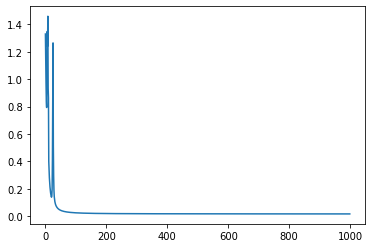

In [9]:
optimizer = SGD(learning_rate=1)

# Creamos el callback para guardar un checkpoint de nuestro modelo en cada iteración
checkpointCallback = ModelCheckpoint("/content/checkpoint.h5")

modelo.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
history = modelo.fit(X, Y_oneHot, epochs=1000, batch_size=X.shape[0], callbacks=[checkpointCallback])

plt.plot(history.history["loss"])
plt.show()

In [10]:
def plotDecisionBoundary(X, modelo):

  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

  grid = np.c_[xx.ravel(), yy.ravel()]
  y_pred = modelo.predict(grid)
  y_pred = np.argmax(y_pred, axis=-1).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, alpha=0.5)
  plt.scatter(X[:,0], X[:,1], c=Y) # Grafica de los datos
  plt.title("Frontera de Decisión")
  plt.show()

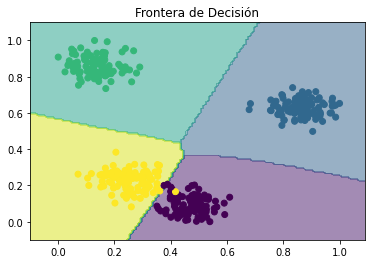

In [11]:
plotDecisionBoundary(X, modelo)

In [12]:
# Guardamos nuestro modelo
modelo.save("/content/modelo.h5")

# **Reto**

Implementar un modelo de reconocimiento de imagenes para el dataset de clasificacion de digitos [MNIST](http://yann.lecun.com/exdb/mnist/).

In [13]:
(X_train, Y_train), (X_test, Y_test) = tfds.mnist.load_data(path="mnist.npz")

print ("Tamaño de X_train: " + str(X_train.shape))
print ("Tamaño de Y_train: " + str(Y_train.shape))
print ("Tamaño de X_test: " + str(X_test.shape))
print ("Tamaño de Y_test: " + str(Y_test.shape))

11493376/11490434 [==============================] - 0s 0us/step
Tamaño de X_train: (60000, 28, 28)
Tamaño de Y_train: (60000,)
Tamaño de X_test: (10000, 28, 28)
Tamaño de Y_test: (10000,)


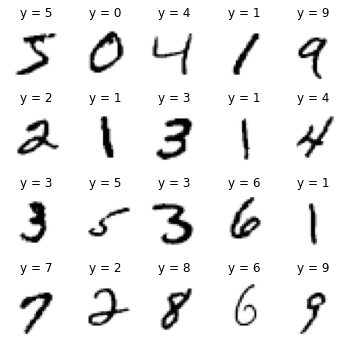

In [18]:
plt.figure(figsize=(6,6))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(X_train[i], cmap="Greys")
  plt.title("y = " + str(Y_train[i]))
  plt.axis("off")